In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [2]:
coffee_dataset = pd.read_csv("data/merged_data_cleaned.csv")

In [3]:
coffee_dataset

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [4]:
coffee_dataset.shape

(1339, 44)

In [5]:
observations = coffee_dataset.shape[0]
print(f"The number of observations is: {observations}")

The number of observations is: 1339


In [6]:
features = coffee_dataset.shape[1]
print(f"The number of features is: {features}")

The number of features is: 44


In [7]:
coffee_dataset.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [8]:
def to_snake_case(column_name):
    column_name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', column_name)
    column_name = column_name.replace('.', '_')
    return column_name.lower()

coffee_dataset.columns = [to_snake_case(col) for col in coffee_dataset.columns]

In [9]:
coffee_dataset.columns

Index(['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [10]:
coffee_dataset

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [11]:
coffee_dataset.bag_weight

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

In [12]:
coffee_dataset.bag_weight.unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

What a mess here... <br />
So, my idea is to remove the unit of measurement (kg, lbs or kg,lbs). I will keep only the number (quantity) and if it's measurement is in kg - OK, but if it's lbs I will convert it to kg. <br />
The data type of the column is `object`. We don't want a number to be an object, so I will convert all the values to floating point number. 

In [13]:
def bag_weight_cleaned(weight):
    if ' kg,lbs' in weight:
        return float(weight.replace(' kg,lbs', ''))
    if ' kg' in weight:
        return float(weight.replace(' kg', ''))
    if ' lbs' in weight:
        return float(weight.replace(' lbs', '')) * 0.45359237
    if weight.isdigit():
        return float(weight)

coffee_dataset.bag_weight = coffee_dataset.bag_weight.apply(bag_weight_cleaned)

In [14]:
coffee_dataset.bag_weight

0       60.000000
1       60.000000
2        1.000000
3       60.000000
4       60.000000
          ...    
1334     2.000000
1335     2.000000
1336     1.000000
1337     2.267962
1338     2.267962
Name: bag_weight, Length: 1339, dtype: float64

And one last step - I will change the name of the column, because now all the values are in kg

In [120]:
coffee_dataset = coffee_dataset.rename(columns={'bag_weight': 'bag_weight_in_kg'})

In [121]:
coffee_dataset.bag_weight_in_kg

0       60.000000
1       60.000000
2        1.000000
3       60.000000
4       60.000000
          ...    
1334     2.000000
1335     2.000000
1336     1.000000
1337     2.267962
1338     2.267962
Name: bag_weight_in_kg, Length: 1338, dtype: float64

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [17]:
coffee_dataset.harvest_year.unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

Nastier??? Yes, it is!

In [18]:
harvest_year = coffee_dataset.harvest_year

In [43]:
harvest_year

0       2014
1       2014
2        NaN
3       2014
4       2014
        ... 
1334    2016
1335    2016
1336    2014
1337    2013
1338    2013
Name: harvest_year, Length: 1339, dtype: object

Using regex, I will extract only the year from the messy text.

In [44]:
def extract_the_year(date):
    year = re.search(r'\b(\d{4}\b)', date)

    if year:
        return year.group(1)
        
    return None

coffee_dataset.harvest_year = coffee_dataset.harvest_year.astype(str)
coffee_dataset.harvest_year = coffee_dataset.harvest_year.apply(extract_the_year)

In [52]:
cleaned_years = coffee_dataset[['harvest_year']]

In [53]:
cleaned_years

,harvest_year
0,2014
1,2014
2,None
3,2014
4,2014
...,...
1334,2016
1335,2016
1336,2014
1337,2013


### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [20]:
coffee_dataset.country_of_origin.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [21]:
country_of_origin_NaN_value = coffee_dataset[coffee_dataset['country_of_origin'].isna()]
country_of_origin_NaN_value

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1197,1197,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,3-37-1980,NaN,NaN,...,NaN,3,"February 29th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN


We can see that there is only one coffee with unknown country of origin.

In this observation there are so many missing values (NaN), so we can drop 

In [124]:
coffee_dataset.dropna(subset=['country_of_origin'], inplace=True)

No more "NaN" countries of origin

In [23]:
coffee_dataset[coffee_dataset['country_of_origin'].isna()]

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters


### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [24]:
coffee_dataset.owner.head(20)

0                              metad plc
1                              metad plc
2               grounds for health admin
3                    yidnekachew dabessa
4                              metad plc
5                              ji-ae ahn
6                          hugo valdivia
7            ethiopia commodity exchange
8            ethiopia commodity exchange
9                 diamond enterprise plc
10                         mohammed lalo
11    cqi q coffee sample representative
12    cqi q coffee sample representative
13              grounds for health admin
14           ethiopia commodity exchange
15    cqi q coffee sample representative
16              grounds for health admin
17           ethiopia commodity exchange
18                yunnan coffee exchange
19                         essencecoffee
Name: owner, dtype: object

In [25]:
coffee_dataset.owner_1.head(20)

0                              metad plc
1                              metad plc
2               Grounds for Health Admin
3                    Yidnekachew Dabessa
4                              metad plc
5                              Ji-Ae Ahn
6                          Hugo Valdivia
7            Ethiopia Commodity Exchange
8            Ethiopia Commodity Exchange
9                 Diamond Enterprise Plc
10                         Mohammed Lalo
11    CQI Q Coffee Sample Representative
12    CQI Q Coffee Sample Representative
13              Grounds for Health Admin
14           Ethiopia Commodity Exchange
15    CQI Q Coffee Sample Representative
16              Grounds for Health Admin
17           Ethiopia Commodity Exchange
18                Yunnan Coffee Exchange
19                         EssenceCoffee
Name: owner_1, dtype: object

`owner_1` is the same as `owner` column but with а capital letter (in some cases)... so we can drop the column. 

In [26]:
coffee_dataset = coffee_dataset.drop('owner_1', axis=1)

In [27]:
coffee_dataset.columns

Index(['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight_in_kg', 'in_country_partner',
       'harvest_year', 'grading_date', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Now, I am going to explore the `producer` column.

In [28]:
coffee_dataset.producer.head(20)

0                                     METAD PLC
1                                     METAD PLC
2                                           NaN
3         Yidnekachew Dabessa Coffee Plantation
4                                     METAD PLC
5                                           NaN
6                                           HVC
7     Bazen Agricultural & Industrial Dev't Plc
8     Bazen Agricultural & Industrial Dev't Plc
9                        Diamond Enterprise Plc
10                      Fahem Coffee Plantation
11                 Alfredo De Jesús López Pérez
12                        Jorge Walter Restrepo
13                 Robert, Sharon, Arianna Wood
14    Bazen Agricultural & Industrial Dev't Plc
15                          María Leticia Diosa
16                             P.T. Toarco Jaya
17      Green Gold Ethiopia | Phone: 0114342032
18                                  Echo Coffee
19                                      LevelUp
Name: producer, dtype: object

What I can see is that some owners are also producers.

In [29]:
coffee_dataset[coffee_dataset.producer.isna()]

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
5,5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
24,24,Arabica,ji-ae ahn,Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
30,30,Arabica,nora zeas,Nicaragua,NaN,NaN,beneficio atlantic condega,790-0013,NaN,NaN,...,NaN,2,"May 18th, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
31,31,Arabica,specialty coffee-korea,"Tanzania, United Republic Of",NaN,NaN,NaN,A019116,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1295,Arabica,honor dela fuente,Colombia,NaN,NaN,NaN,3,costco wholesale industries,NaN,...,Bluish-Green,15,"March 3rd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
1296,1296,Arabica,eileen koyanagi,United States (Hawaii),NaN,NaN,NaN,KP 022014,kona pacific farmers cooperative,NaN,...,Green,9,"March 10th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
1302,1302,Arabica,volcafe ltda. - brasil,Brazil,NaN,2017/2018 - Lot 2,copag,NaN,volcafe ltda.,NaN,...,Green,55,"October 27th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


But there are so many missing values (231). What I am going to do is fill in these missing values with the corresponding owner values. I can't be sure it will be correct, but I can make an assumption.

In [125]:
coffee_dataset.producer = coffee_dataset.producer.fillna(coffee_dataset.owner)

No more missing values in the producer column.

In [126]:
coffee_dataset[coffee_dataset.producer.isna()]

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters


### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [127]:
pivot_table = coffee_dataset.pivot_table(
    index='country_of_origin',
    columns='color',
    aggfunc='size'
)

In [128]:
pivot_table

color,Blue-Green,Bluish-Green,Green
country_of_origin,,,
Brazil,14.0,12.0,92.0
Burundi,NaN,NaN,1.0
China,NaN,NaN,16.0
Colombia,8.0,8.0,118.0
Costa Rica,10.0,9.0,28.0
Cote d?Ivoire,NaN,1.0,NaN
Ecuador,2.0,1.0,NaN
El Salvador,2.0,2.0,9.0
Ethiopia,NaN,2.0,15.0


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

First of all I will take all the columns I need - (slice them from the original dataset). In this case I am making a subset of 12 columns which represent subjective ratings for the coffees (from "aroma" to "moisture").

In [64]:
# slicing using loc[]

coffee_subjective_ratings = coffee_dataset.loc[:, "aroma":"moisture"]

In [119]:
coffee_subjective_ratings

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1336,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1337,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


How is it possible to analyze without the `describe` method?
Using the method we can see important things for every column like `count`, `min value`, `max value`, etc. 

In [71]:
coffee_subjective_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
aroma,1338.0,7.567317,0.377040,0.0,7.4200,7.58,7.75,8.75
flavor,1338.0,7.521001,0.398033,0.0,7.3300,7.58,7.75,8.83
aftertaste,1338.0,7.401816,0.403723,0.0,7.2500,7.42,7.58,8.67
acidity,1338.0,7.536233,0.379478,0.0,7.3300,7.58,7.75,8.75
body,1338.0,7.517451,0.370198,0.0,7.3300,7.50,7.67,8.58
balance,1338.0,7.518027,0.409096,0.0,7.3300,7.50,7.75,8.75
uniformity,1338.0,9.834753,0.554780,0.0,10.0000,10.00,10.00,10.00
clean_cup,1338.0,9.834985,0.764218,0.0,10.0000,10.00,10.00,10.00
sweetness,1338.0,9.856584,0.616320,0.0,10.0000,10.00,10.00,10.00
cupper_points,1338.0,7.503565,0.473591,0.0,7.2500,7.50,7.75,10.00


We need and the range of values for every property. The range means the maximum column value minus the minimum.

In [88]:
cols = coffee_subjective_ratings.columns

for column in cols:
    range = coffee_subjective_ratings[column].max() - coffee_subjective_ratings[column].min()
    print(f"The range of column '{column}' is {range}")

The range of column 'aroma' is 8.75
The range of column 'flavor' is 8.83
The range of column 'aftertaste' is 8.67
The range of column 'acidity' is 8.75
The range of column 'body' is 8.58
The range of column 'balance' is 8.75
The range of column 'uniformity' is 10.0
The range of column 'clean_cup' is 10.0
The range of column 'sweetness' is 10.0
The range of column 'cupper_points' is 10.0
The range of column 'total_cup_points' is 90.58
The range of column 'moisture' is 0.28


It is noticeable that in each of the columns the range value is the same as maximum value. This is because each min value is 0.

For a better vision let's make some plots.

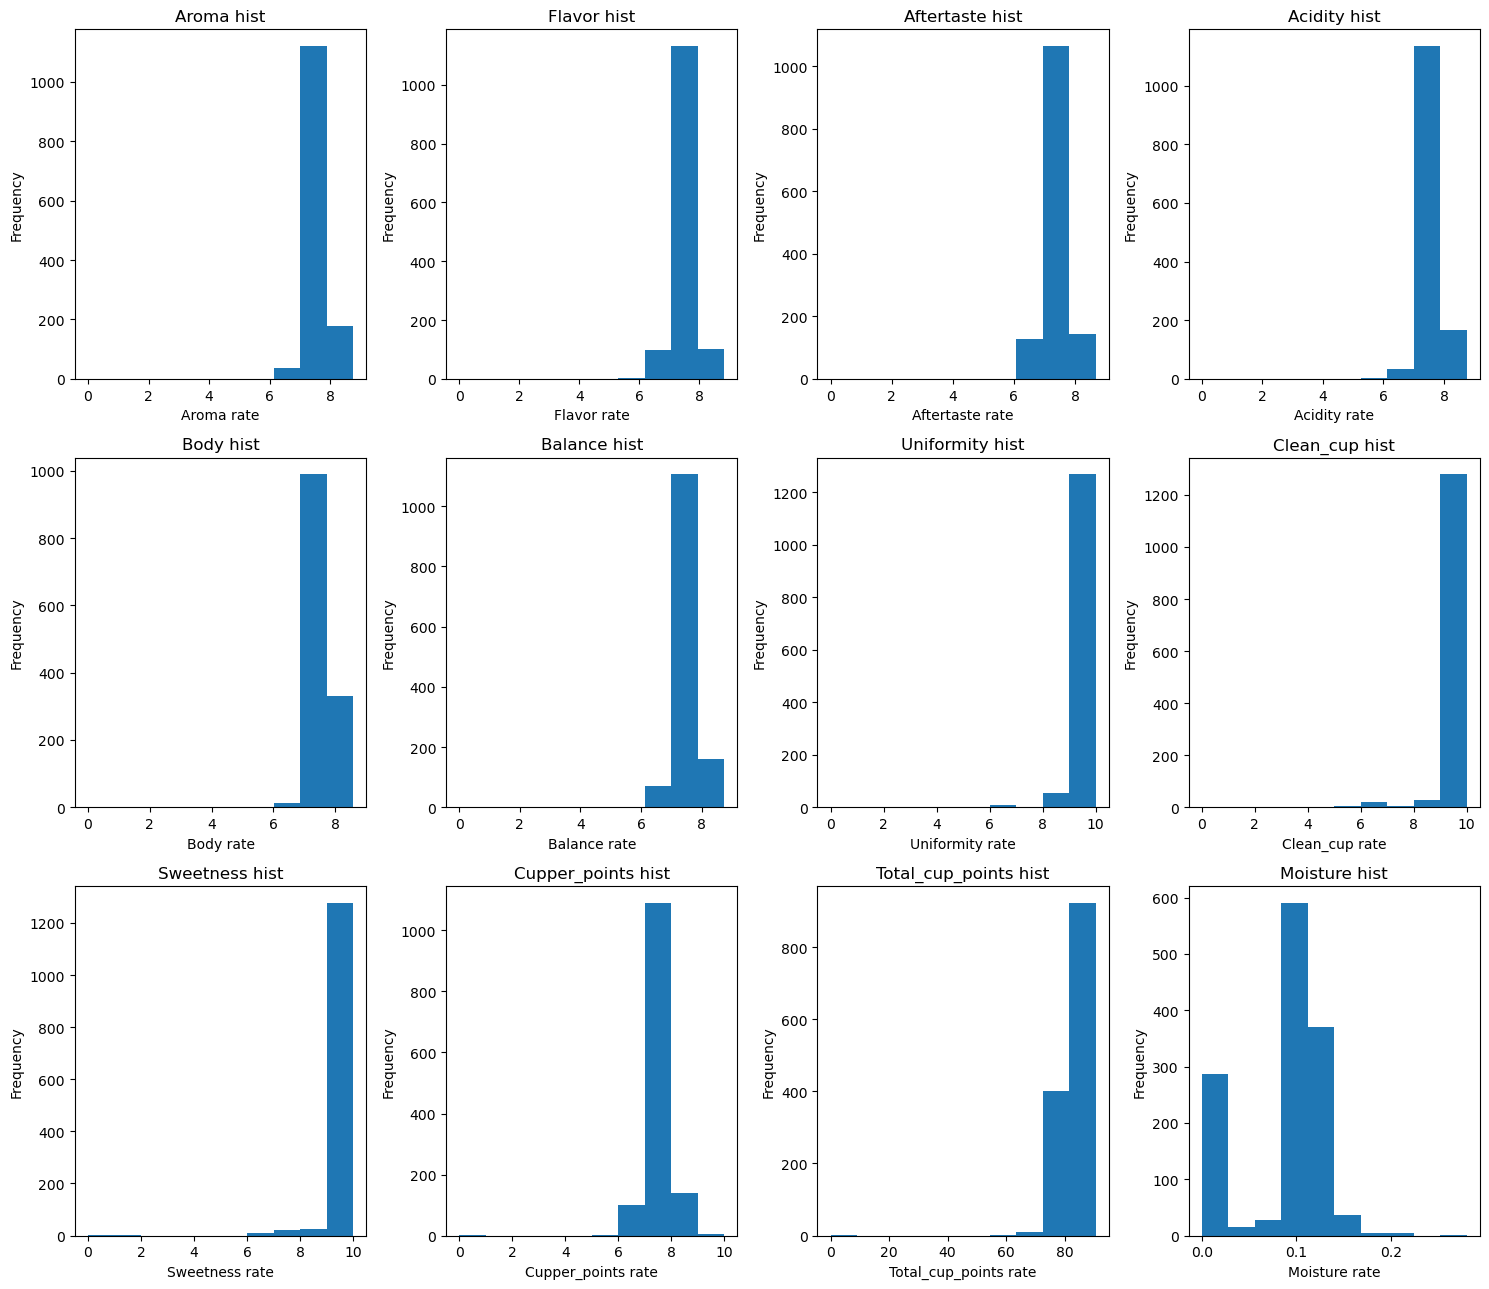

In [116]:
fig, axes = plt.subplots(3, 4, figsize=(15, 13))

axes = axes.flatten()

for i, column in enumerate(coffee_subjective_ratings.columns):
    ax = axes[i]
    coffee_subjective_ratings[column].plot(kind='hist', ax=ax, title=f'{column.capitalize()} hist')
    ax.set_xlabel(f"{column.capitalize()} rate")
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can notice that almost all of the properies have similar values, except the `total cup points` (much bigger values) and `moisture rate` (values around 0). <br/>
Apart from these two, the others have quite similar distributions, maximum values and even identical minimum values.

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!